# Morphological Processing

## Setup

### Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import packages

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from google.colab.patches import cv2_imshow

### Read imagem from google drive

In [3]:
def read_image(img_name: str, mode: str) -> np.ndarray:
    """Read image"""

    if mode == 'E':
        dir_path = 'drive/MyDrive/Fakultät/6/Processamento Digital de Imagens/M3/Colab Notebooks/data/data_mp/'
    elif mode == 'P':
        dir_path = '/content/'
    else:
      raise Exception("Invalid directory")

    img_path = dir_path + img_name

    return cv2.imread(img_path, 0) / 255

## Writing

### Calc

#### ABV guide

iw = Image Width

ih = Image Height

kw = kernel Width

kh = kernel Height

nb = neighborhood

kn = kernel

img = image

img_e = image erode

dca = dilation_compare_array

eca = erosion_compare_array

#### Utils

In [4]:
def print_array(nb, kn):
    print("Kernel:")
    print(nb)
    print("\nNeighborhood:")
    print(kn)

In [5]:
def plot_img1(name: str, image: np.ndarray, position: int):
    plt.subplot(position),plt.imshow(image, cmap = 'gray')
    plt.title(name), plt.xticks([]), plt.yticks([])

In [6]:
def plot_img2(img1: np.ndarray, img2: np.ndarray, name1="Image 1", name2="Image 2"):
    plt.figure(figsize=(6, 6))

    plot_img1(name1, img1, 121)
    plot_img1(name2, img2, 122)

    plt.tight_layout()
    plt.show()

#### Funcs

##### Image

In [7]:
img_name_1 = 'Fig0905(a)(wirebond-mask).tif'
img_name_2 = 'Fig0907(a)(text_gaps_1_and_2_pixels).tif'
img_name_3 = 'Fig0911(a)(noisy_fingerprint).tif'

mode = 'E'
#mode = 'P'
img_1 = read_image(img_name_1, mode)
img_2 = read_image(img_name_2, mode)
img_3 = read_image(img_name_3, mode)

##### Kernel

In [27]:
kn_size = [3, 3]
kn = np.ones(kn_size)

##### Erosion, Dilation and Convolution

###### Erosion

In [9]:
def eca(nb: np.ndarray, kn: list):
    for i in range(nb.shape[0]):
        for j in range(nb.shape[1]):
            if nb[i, j] != kn[i, j]:
                return False

    return True

In [10]:
def erode(img: np.ndarray, kn: list) -> np.ndarray:
    iw, ih = img.shape[:2]
    kw, kh = kn.shape[:2]

    img_e = np.zeros_like(img, dtype=np.uint8)

    w_limit = 1
    if (kw % 2 == 0):
      w_limit = 0
    h_limit = 1
    if (kh % 2 == 0):
      h_limit = 0

    kw = kw // 2
    kh = kh // 2

    img_d = np.zeros_like(img, dtype=np.uint8)

    if (kw == 0):
      kw = 1
      w_limit = -1
    if kh == 0:
      kh = 1
      h_limit = -1

    for i in range(kw, iw - kw):
        for j in range(kh, ih - kh):
            nb = img[i - kw : i + kw + w_limit, j - kh : j + kh + h_limit]
            equal = eca(nb, kn)
            img_e[i, j] = 1 if equal else 0

    return img_e

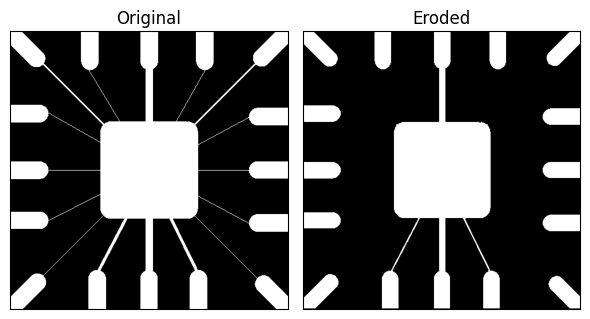

In [11]:
img_e = erode(img_1, kn)
plot_img2(img_1, img_e, "Original", "Eroded")

###### Dilation

In [12]:
def dca(nb: np.ndarray, kn: list):
    for i in range(nb.shape[0]):
        for j in range(nb.shape[1]):
            if nb[i, j] == kn[i, j]:
                return True
    return False

In [13]:
def dilate(img: np.ndarray, kn: list) -> np.ndarray:
    iw, ih = img.shape[:2]
    kw, kh = kn.shape[:2]

    w_limit = 1
    if (kw % 2 == 0):
      w_limit = 0
    h_limit = 1
    if (kh % 2 == 0):
      h_limit = 0

    kw = kw // 2
    kh = kh // 2

    img_d = np.zeros_like(img, dtype=np.uint8)

    if (kw == 0):
      kw = 1
      w_limit = -1
    if kh == 0:
      kh = 1
      h_limit = -1

    for i in range(kw, iw - kw):
        for j in range(kh, ih - kh):
            b1 = i - kw
            b2 = i + kw + w_limit
            b3 = j - kh
            b4 = j + kh + h_limit
            nb = img[b1: b2, b3 : b4]

            # print("NB:")
            # print(len(nb))
            # print(nb)
            # print("\n")
            # print("kn:")
            # print(len(kn))
            # print(kn)
            # print("\n")

            # print("i: " + str(i))
            # print("kw: " + str(kw))
            # print("w_limit: " + str(w_limit))
            # print("i - kw: " + str(b1))
            # print("i + kw + w_limit: "+ str(b2))
            # print("\n")

            # print("j: " + str(j))
            # print("kh: " + str(kh))
            # print("h_limit: " + str(h_limit))
            # print("j - kh: "+ str(b3))
            # print("j + kh + h_limit: "+ str(b4))
            # print("\n")

            equal = dca(nb, kn)
            img_d[i, j] = 1 if equal else 0
    return img_d

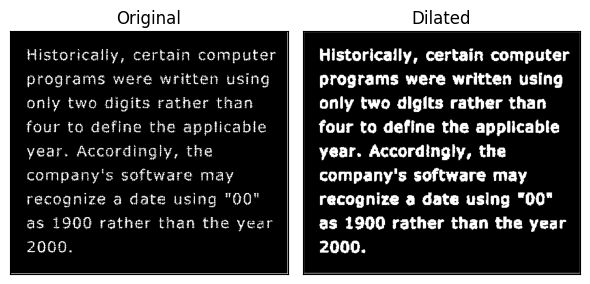

In [14]:
img_d = dilate(img_2, kn)
plot_img2(img_2, img_d, "Original", "Dilated")

###### Convolution

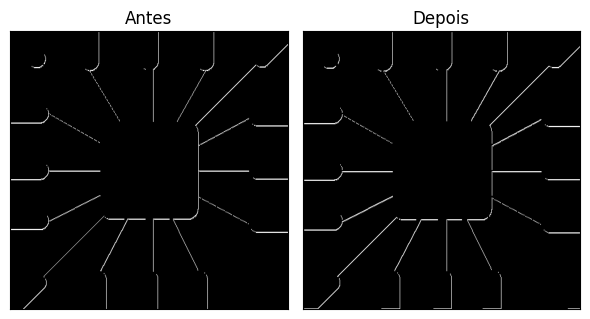

In [32]:
def convolution(image, mask):
  N = mask.shape[0] // 2
  image_with_border = cv2.copyMakeBorder(image, N, N, N, N, cv2.BORDER_CONSTANT, value=(0, 0, 0))
  HIGHT, WIDTH = image_with_border.shape
  image_to_return = np.zeros(image.shape)
  for row in range(N, HIGHT-N):
    for column in range(N, WIDTH-N):
        limite = 0
        nb = image_with_border[row-N:row+N+limite, column-N:column+N+limite]
        total = np.sum(mask * nb).clip(0, 1)
        image_to_return[row-N, column-N] = total
  return image_to_return

right = np.array([[1, 0],
                  [0,  -1]])

left = np.array([[0, 1],
                 [-1,  0]])

antes_1 = convolution(img_1, right)
antes_2 = convolution(antes_1, left)
antes_2 = np.clip(antes_1 + antes_2, 0, 1)

depois_1 = convolution(dilate(img_1, kn), right)
depois_2 = convolution(depois_1, left)
depois_2 = np.clip(depois_1 + depois_2, 0, 1)

plot_img2(antes_2, depois_2, "Antes", "Depois")

##### Open, Close and Filter

###### Open

In [16]:
def open(img: np.ndarray, kn) -> np.ndarray:
    img_o = erode(img, kn)
    img_o = dilate(img_o, kn)

    return img_o

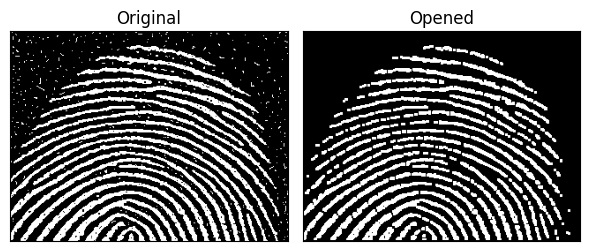

In [28]:
img_o = open(img_3, kn)
plot_img2(img_3, img_o, "Original", "Opened")

###### Close

In [18]:
def close(img: np.ndarray, kn: list) -> np.ndarray:
    img_c = dilate(img, kn)
    img_c = erode(img_c, kn)

    return img_c

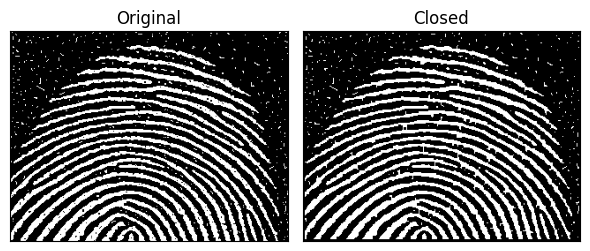

In [29]:
img_c = close(img_3, kn)
plot_img2(img_3, img_c, "Original", "Closed")

###### Filter

In [20]:
def filter(img: np.ndarray, kn: list) -> np.ndarray:
    img_f = open(img, kn)
    img_f = close(img_f, kn)

    return img_f

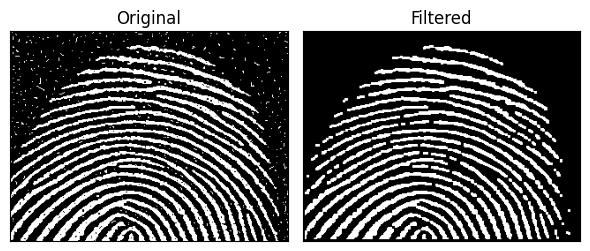

In [31]:
img_f = filter(img_3, kn)
plot_img2(img_3, img_f, "Original", "Filtered")

## Relatório

https://docs.google.com/document/d/11iX8DZ3wZlXWL0ZmiV2XIFCuBWNUZNv-ARSHr-Z2m3A/edit?usp=sharing

## Description

### Steps

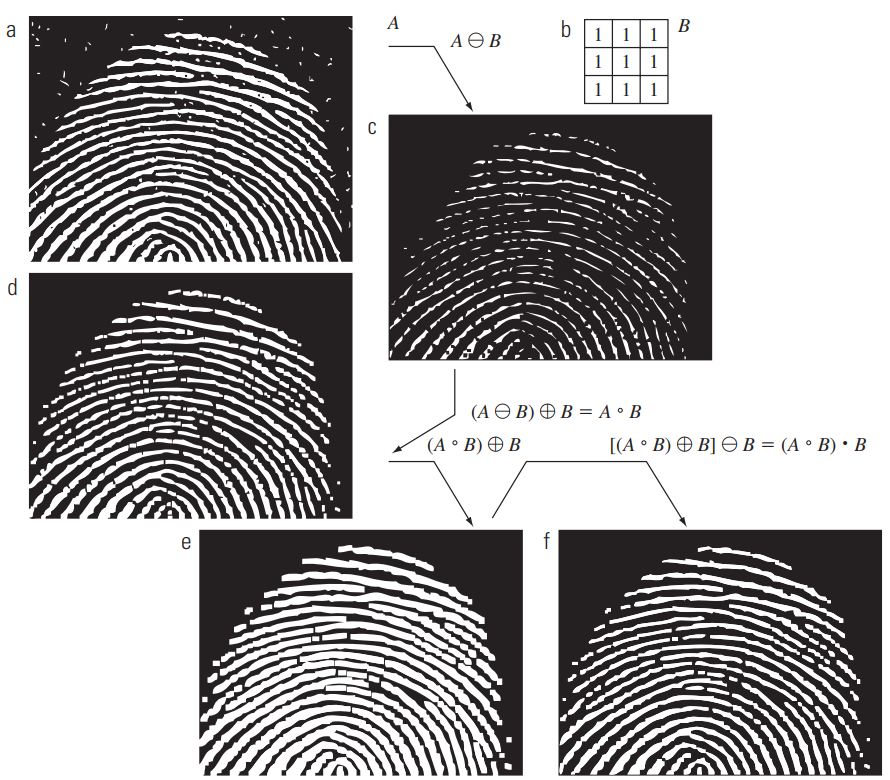

### Erosão e Dilatação


**1. Implemente a sua própria versão da erosão em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0905(a)(wirebond-mask)**

**2. Implemente a sua própria versão da dilatação em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0907(a)(text_gaps_1_and_2_pixels)**

4. Relate as observações visíveis nas imagens de saída com os processamentos aplicados, descrevendo o comportamento visual em relação as bordas, junção, perda de informação e mlhoria na qualidade visual.

**5. Aplique o seu algoritmo de detecção de borda (roberts ou sobel) a imagem ImagensMorfologia/Fig0905(a)(wirebond-mask) antes e depois de utilizar a dilatação/erosão e relate os resultados.**

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255. O ruído pode ser intensificado ou excluído com processamento morfológico.

### Abertura e Fechamento



**5. Implemente a sua versão do algoritmo de abertura em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)**

**6. Implemente a sua versão do algoritmo de fechamento em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)**

**7. Aplique o processamento indicado na image abaixo usando a figura ImagensMorfologia/Fig0911(a)(noisy_fingerprint)**